<a href="https://colab.research.google.com/github/asumanulusoy/diabetes_prediction_with_machine_learning/blob/main/makine_%C3%B6%C4%9Frenmesi_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gerekli Kütüphaneleri Yükleme İşlemi**

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## **Veri Setini Okuma**

In [22]:
data = pd.read_csv("diabetes.csv")

# Veri setini inceleme
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

# **Normalizasyon İşlemi**

MinMaxScaler kullanarak veri setini normalleştirme işlemi yaptım. Min-Max normalizasyonunu uygulamak için sklearn kütüphanesini kullandım ve ardından normalleştirilmiş veri setini pandas DataFrame'ine dönüştürdüm. Kontrol amaçlı ilk birkaç satırını yazdırdım ve ödevimdeki tüm algoritmalar için yaptığım bu Min-Max normalizasyon işlemi üzerinden ilerledim.

In [23]:
# Hedef değişkeni ayrı bir değişkene atıyoruz
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Min-max normalizasyonu
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Normalizasyon sonrası veri seti
normalizedDf = pd.DataFrame(X_normalized, columns=X.columns)
# 'Outcome' sütununu ekleyerek normalizasyon sonrası veri setini oluşturma
normalizedDf['Outcome'] = y

# Normalized veri setini kontrol etme
print(normalizedDf)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

# **Naive Bayes Sınıflandırıcısı**

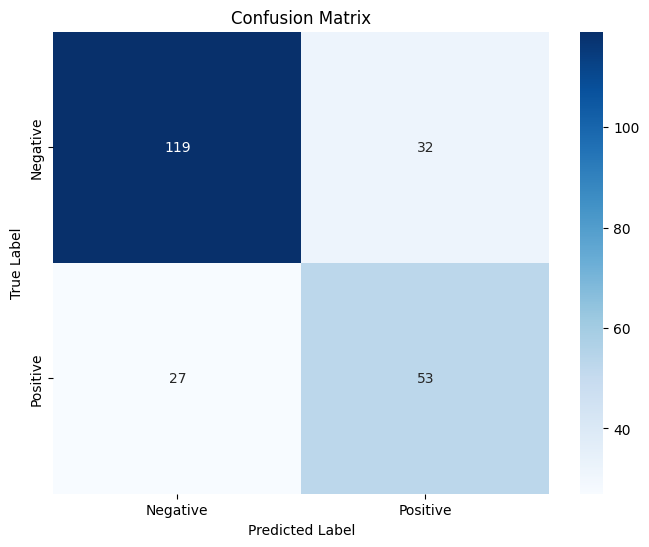

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

Accuracy: 0.7445887445887446
Sensitivity (True Positive Rate): 0.6625
Specificity (True Negative Rate): 0.7880794701986755
Recall: 0.6625


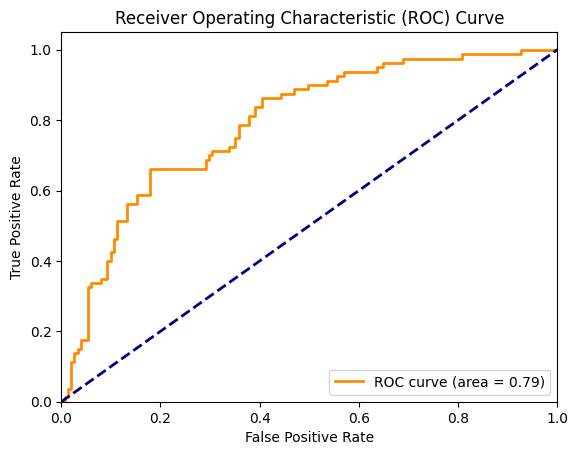

In [30]:
from sklearn.metrics import accuracy_score

# Veri setini %70 eğitim ve %30 test olarak ayırdım
X = normalizedDf.drop(columns=['Outcome'])
y = normalizedDf['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını oluşturma ve eğitme
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test veri seti üzerinde tahminler yapma
y_pred = nb_model.predict(X_test)

# Confusion matrix oluşturma
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma raporu oluşturma
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Accuracy hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Sensitivity (True Positive Rate) hesaplama
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print("Sensitivity (True Positive Rate):", sensitivity)

# Specificity (True Negative Rate) hesaplama
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity (True Negative Rate):", specificity)

# Recall hesaplama
recall = sensitivity
print("Recall:", recall)

# ROC eğrisi ve AUC skoru hesaplama
roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


True Negative (TN): 119 - Gerçek negatif örneklerin doğru olarak negatif tahmin edildiği durum.

False Positive (FP): 32 - Gerçek negatif örneklerin yanlış olarak pozitif tahmin edildiği durum.

False Negative (FN): 27 - Gerçek pozitif örneklerin yanlış olarak negatif tahmin edildiği durum.

True Positive (TP): 53 - Gerçek pozitif örneklerin doğru olarak pozitif tahmin edildiği durum.

**Classification Report Yorumu:**

Sınıf 0 (Negatif Sınıf) İçin:
Precision (0.82): Negatif olarak tahmin edilen örneklerin %82'si gerçekten negatif. Yani model, negatif tahmin yaparken yüksek doğrulukla çalışıyor.
Recall (0.79): Gerçek negatif örneklerin %79'u doğru olarak negatif tahmin edilmiş. Bu, negatif sınıfı tespit etmede modelin oldukça başarılı olduğunu gösterir.
F1-Score (0.80): Precision ve recall'un harmonik ortalaması olan F1-Score, modelin negatif sınıfı tahmin ederken dengeli bir performans sergilediğini gösterir.
Support (151): Negatif sınıfa ait toplam örnek sayısı. Bu, veri setindeki negatif örneklerin sayısını gösterir.

Sınıf 1 (Pozitif Sınıf) İçin:
Precision (0.62): Pozitif olarak tahmin edilen örneklerin %62'si gerçekten pozitif. Bu, modelin pozitif tahminlerde daha fazla hata yaptığını gösterir.
Recall (0.66): Gerçek pozitif örneklerin %66'sı doğru olarak pozitif tahmin edilmiş. Pozitif sınıfı tespit etmede modelin yeterli olduğunu ama geliştirilmesi gerektiğini gösterir.
F1-Score (0.64): Precision ve recall'un harmonik ortalaması olan F1-Score, pozitif sınıfı tahmin ederken modelin daha düşük bir performans sergilediğini gösterir.
Support (80): Pozitif sınıfa ait toplam örnek sayısı. Bu, veri setindeki pozitif örneklerin sayısını gösterir.

Negatif sınıf için yüksek precision (%82) ve recall (%79) değerleri, modelin negatif örnekleri iyi tanımladığını gösteriyor.

Genel **accuracy** %74, modelin doğru tahmin oranının makul seviyede olduğunu gösteriyor.

Pozitif sınıf için precision (%62) ve recall (%66) değerleri, modelin pozitif örnekleri tanımlama konusunda zayıf kaldığını gösteriyor.

Özellikle FP ve FN sayıları, modelin yanlış pozitif ve yanlış negatif tahminlerde bulunduğunu gösteriyor.

Modelin **AUC skoru** 0.79, modelin genel performansının tatmin edici olduğunu gösteriyor.

ROC eğrisinin büyük kısmı y = x çizgisinin üstünde kalarak modelin doğru tahmin oranının yüksek olduğunu işaret ediyor.

AUC skoru 1'e yakın olmadığı için modelin mükemmel olmadığını ve yanlış pozitif oranının (FPR) hala belirgin olduğunu gösteriyor.

ROC eğrisinin bazı kısımlarında eğrinin dikliği azalarak, bazı eşik değerlerinde modelin performansının düşebileceğini işaret ediyor.

# **Naive Bayes Optimizasyonu**

En iyi parametreler: {'var_smoothing': 0.533669923120631}


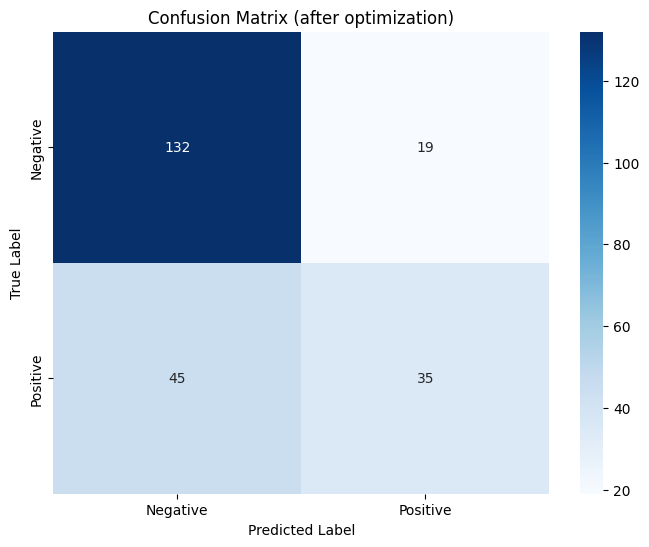

Classification Report (after optimization):
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       151
           1       0.65      0.44      0.52        80

    accuracy                           0.72       231
   macro avg       0.70      0.66      0.66       231
weighted avg       0.71      0.72      0.71       231

Accuracy (after optimization): 0.7229437229437229
Sensitivity (True Positive Rate) (after optimization): 0.4375
Specificity (True Negative Rate) (after optimization): 0.8741721854304636
Recall (after optimization): 0.4375


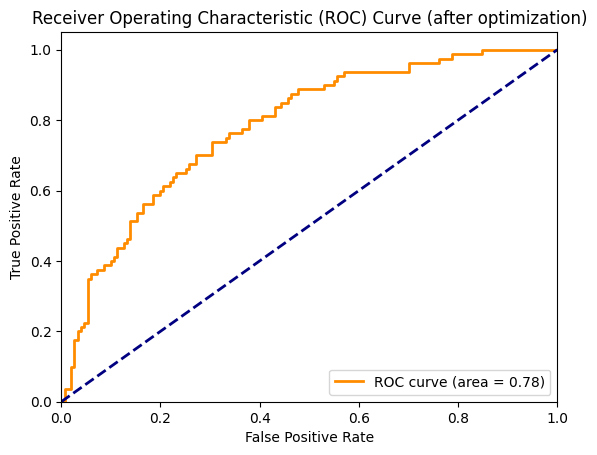

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# GridSearchCV için parametre grid'i tanımlama
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# GridSearchCV modelini oluşturma
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, scoring='roc_auc')

# Modeli eğitme
grid_search.fit(X_train, y_train)

# En iyi parametreleri bulma
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

# En iyi modeli seçme
best_model = grid_search.best_estimator_

# Test veri seti üzerinde tahminler yapma
y_pred_best = best_model.predict(X_test)

# Confusion matrix oluşturma
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Optimizasyon Sonrası)')
plt.show()

# Sınıflandırma raporu oluşturma
class_report_best = classification_report(y_test, y_pred_best)
print("Classification Report (Optimizasyon Sonrası):")
print(class_report_best)

# Accuracy hesaplama
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy (Optimizasyon Sonrası):", accuracy_best)

# Sensitivity (True Positive Rate) hesaplama
sensitivity_best = conf_matrix_best[1, 1] / (conf_matrix_best[1, 1] + conf_matrix_best[1, 0])
print("Sensitivity (True Positive Rate) (Optimizasyon Sonrası):", sensitivity_best)

# Specificity (True Negative Rate) hesaplama
specificity_best = conf_matrix_best[0, 0] / (conf_matrix_best[0, 0] + conf_matrix_best[0, 1])
print("Specificity (True Negative Rate) (Optimizasyon Sonrası):", specificity_best)

# Recall hesaplama )
recall_best = sensitivity_best
print("Recall (Optimizasyon Sonrası):", recall_best)


# ROC eğrisi ve AUC skoru hesaplama
roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Optimizasyon Sonrası)')
plt.legend(loc="lower right")
plt.show()


132 doğru negatif sınıflandırma ve 35 doğru pozitif sınıflandırma yapılmıştır. Ancak, 19 yanlış negatif ve 45 yanlış pozitif sınıflandırma yapılmıştır.

Classification Report (Optimizasyon Sonrası):

Bu rapor, modelin precision, recall ve f1-score gibi sınıflandırma performans metriklerini sunar. Örneğin, pozitif sınıf için precision 0.65 ve recall 0.44'tür. Bu, modelin pozitif olarak sınıflandırdığı örneklerin %65'ini gerçekten pozitif olarak sınıflandırırken, gerçek pozitif örneklerin %44'ünü yakaladığını gösterir.

ROC Area (AUC Score): 0.78
Bu değer, ROC eğrisinin altında kalan alanı ifade eder ve modelin sınıflandırma performansının genel olarak nasıl olduğunu ölçer. 1'e ne kadar yakınsa, modelin o kadar iyi performans gösterdiğini gösterir. Bu durumda, ROC alanı 0.78 olduğundan, modelin iyi ancak mükemmel olmadığını söyleyebiliriz.

 Optimizasyon öncesi recall değerleri:

Negatif sınıf (0) recall: 0.79

Pozitif sınıf (1) recall: 0.66

Optimizasyon sonrası recall değerleri:

Negatif sınıf (0) recall: 0.87

Pozitif sınıf (1) recall: 0.44

Bu değerler, her bir sınıfın doğru olarak sınıflandırılma oranını ifade eder. Optimizasyon sonrası, negatif sınıfın recall değeri artmış (0.79'dan 0.87'ye), ancak pozitif sınıfın recall değeri düşmüş (0.66'dan 0.44'e). Ayrıca accuracy ve sensitivity değerlerinde bir düşüş görülürken, specificity değeri artmıştır.  Bu, modelin negatif sınıfı daha iyi tanıma eğiliminde olduğunu ancak pozitif sınıfı daha az etkin bir şekilde tanıma eğiliminde olduğunu gösterir. Bu, modelin optimize edildikten sonra pozitif sınıfı daha az yanlış sınıflandırdığını, ancak daha az gerçek pozitif örneği tanıdığını gösterebilir.
 Ancak, ROC alanı 0.78 olduğundan, modelin genel olarak makul bir performansa sahip olduğunu söyleyebiliriz.

# **K-en Yakın Komşuluk Sınıflandırıcısı**

[[118  33]
 [ 41  39]]


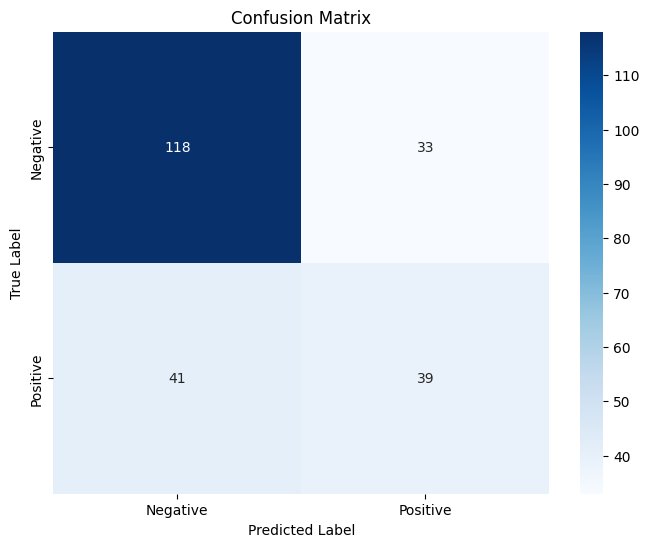

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231

Accuracy: 0.6796536796536796
Sensitivity (True Positive Rate): 0.4875
Specificity (True Negative Rate): 0.7814569536423841
Recall: 0.4875


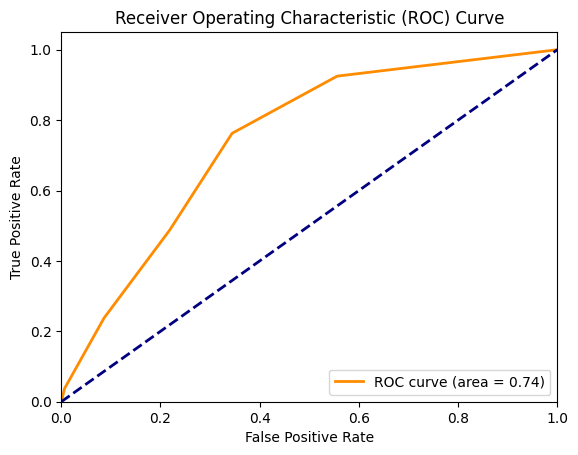

In [53]:
# Veri setini yükleme ve ayırma
X = normalizedDf.drop(columns=['Outcome'])
y = normalizedDf['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN modelini oluşturma
knn_model = KNeighborsClassifier()

# Modeli eğitme
knn_model.fit(X_train, y_train)

# Test veri seti üzerinde tahminler yapma
y_pred_knn = knn_model.predict(X_test)

# Confusion matrix oluşturma
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma raporu oluşturma
class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(class_report_knn)

# Accuracy hesaplama
accuracy_knn = (conf_matrix_knn[0, 0] + conf_matrix_knn[1, 1]) / np.sum(conf_matrix_knn)
print("Accuracy:", accuracy_knn)

# Sensitivity (True Positive Rate) hesaplama
sensitivity_knn = conf_matrix_knn[1, 1] / (conf_matrix_knn[1, 1] + conf_matrix_knn[1, 0])
print("Sensitivity (True Positive Rate):", sensitivity_knn)

# Specificity (True Negative Rate) hesaplama
specificity_knn = conf_matrix_knn[0, 0] / (conf_matrix_knn[0, 0] + conf_matrix_knn[0, 1])
print("Specificity (True Negative Rate):", specificity_knn)

# Recall hesaplama (Sensitivity ile aynı)
recall_knn = sensitivity_knn
print("Recall:", recall_knn)

# ROC eğrisi ve AUC skoru hesaplama
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Accuracy (Doğruluk):** Modelin doğruluk oranı, tüm tahminlerin ne kadarının doğru olduğunu gösterir. Bu durumda, yaklaşık %68'lik bir doğruluk elde ettik. Ancak, veri setinin sınıf dengesizliği göz önüne alındığında, bu doğruluk oranı tek başına modelin performansını değerlendirmek için yeterli olmayabilir.

**Sensitivity (True Positive Rate - TPR):** Hassasiyet, gerçek pozitiflerin ne kadarının doğru bir şekilde tahmin edildiğini gösterir. Modelimiz için TPR yaklaşık %49 civarında. Bu, modelin pozitif vakaları kaçırdığını ve yanlış negatif tahminler yaptığını gösteriyor. Özellikle, hassasiyet düşük olduğunda, potansiyel olarak tedavi edilmesi gereken pozitif vakaların kaçırılabileceği bir risk söz konusu olabilir.

**Specificity (True Negative Rate - TNR):** Özgüllük, gerçek negatiflerin ne kadarının doğru bir şekilde tahmin edildiğini gösterir. Modelimizin TNR değeri yaklaşık %78 civarındadır. Bu, modelin genellikle negatif vakaları doğru bir şekilde sınıflandırdığını gösterir. Ancak, yine de iyileştirilebilecek bir alan olduğunu unutmamak önemlidir.

**F1-Score:** F1-Score, hassasiyet ve özgüllük arasındaki dengeyi sağlar. Bu ölçüm, modelin dengeli bir şekilde pozitif ve negatif sınıfları sınıflandırma yeteneğini değerlendirir. Veri setinin dengesizliği göz önüne alındığında, F1-Score'un da doğruluk değerinden daha güvenilir bir performans ölçütü olduğunu belirtmek önemlidir.

**ROC Eğrisi ve AUC Skoru:** ROC eğrisi, farklı sınırlayıcı değerler altında TPR ve FPR arasındaki ilişkiyi gösterir. AUC skoru, bu eğrinin altındaki alanı temsil eder. Modelimiz için ROC eğrisi oldukça belirgin ve AUC skoru 0.74 civarındadır. Bu, modelin pozitif ve negatif sınıfları ayırt etme yeteneğinin oldukça makul olduğunu gösterir, ancak hala iyileştirme alanı olduğunu işaret eder.

Sonuç olarak, modelimizin performansı orta düzeyde ancak iyileştirme potansiyeli olan bir noktada görünüyor. Özellikle, pozitif sınıfın tahmin edilmesindeki zayıf performans, modelin iyileştirilmesi gereken bir alan olarak öne çıkıyor.

# **K-en Yakın Komşuluk Sınıflandırıcısı Optimizasyonu**

En iyi parametreler: {'n_neighbors': 15}
[[126  25]
 [ 42  38]]


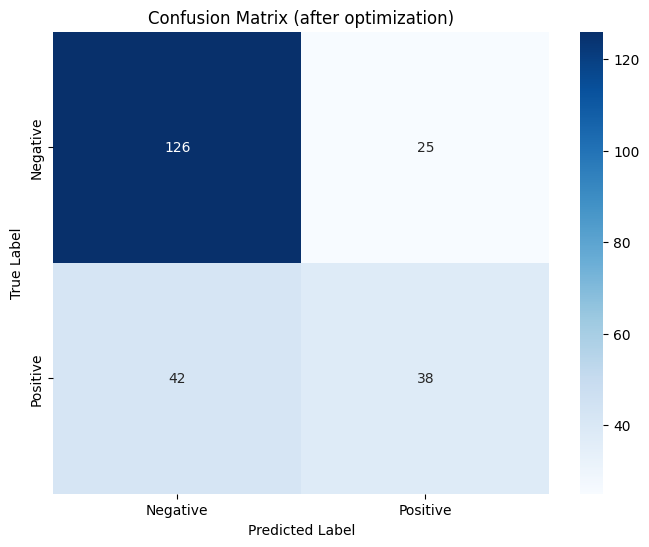

Classification Report (after optimization):
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       151
           1       0.60      0.47      0.53        80

    accuracy                           0.71       231
   macro avg       0.68      0.65      0.66       231
weighted avg       0.70      0.71      0.70       231

Accuracy (after optimization): 0.70995670995671
Sensitivity (True Positive Rate) (after optimization): 0.475
Specificity (True Negative Rate) (after optimization): 0.8344370860927153
Recall (after optimization): 0.475


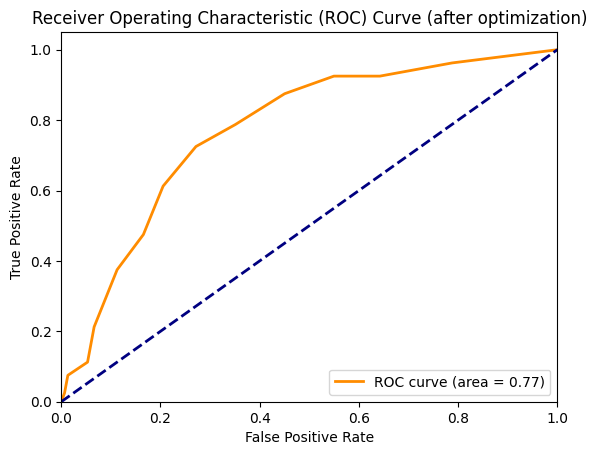

In [54]:
# Veri setini yükleme ve ayırma
X = normalizedDf.drop(columns=['Outcome'])
y = normalizedDf['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN modelini oluşturma
knn_model = KNeighborsClassifier()

# RandomizedSearchCV için parametre dağılımını tanımlama
param_dist = {'n_neighbors': np.arange(1, 21)}  # 1'den 20'ye kadar k değerleri için arama yapılacak

# RandomizedSearchCV modelini oluşturma
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='roc_auc', random_state=42)

# Modeli eğitme
random_search.fit(X_train, y_train)

# En iyi parametreleri bulma
best_params = random_search.best_params_
print("En iyi parametreler:", best_params)

# En iyi modeli seçme
best_knn_model = random_search.best_estimator_

# Test veri seti üzerinde tahminler yapma
y_pred_best_knn = best_knn_model.predict(X_test)

# Confusion matrix oluşturma
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (after optimization)')
plt.show()

# Sınıflandırma raporu oluşturma
class_report_best_knn = classification_report(y_test, y_pred_best_knn)
print("Classification Report (after optimization):")
print(class_report_best_knn)

# Accuracy hesaplama
accuracy_knn = accuracy_score(y_test, y_pred_best_knn)
print("Accuracy (after optimization):", accuracy_knn)

# Sensitivity (True Positive Rate) hesaplama
sensitivity_knn = conf_matrix_best_knn[1, 1] / (conf_matrix_best_knn[1, 1] + conf_matrix_best_knn[1, 0])
print("Sensitivity (True Positive Rate) (after optimization):", sensitivity_knn)

# Specificity (True Negative Rate) hesaplama
specificity_knn = conf_matrix_best_knn[0, 0] / (conf_matrix_best_knn[0, 0] + conf_matrix_best_knn[0, 1])
print("Specificity (True Negative Rate) (after optimization):", specificity_knn)

# Recall hesaplama (Sensitivity ile aynı)
recall_knn = sensitivity_knn
print("Recall (after optimization):", recall_knn)


# ROC eğrisi ve AUC skoru hesaplama
roc_auc_best_knn = roc_auc_score(y_test, best_knn_model.predict_proba(X_test)[:, 1])
fpr_best_knn, tpr_best_knn, thresholds_best_knn = roc_curve(y_test, best_knn_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_best_knn, tpr_best_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (after optimization)')
plt.legend(loc="lower right")
plt.show()


Optimizasyon öncesi ve sonrası karşılaştırması, modelin iyileştirilmiş bir performans sergilediğini açıkça göstermektedir. Optimizasyon sonrasında,modelin doğruluğu artmıştır. (Accuracy oranı %68'den %71'e yükselmiştir. Bu, tüm tahminlerin doğruluğunun arttığını gösterir) Confusion matrix incelendiğinde, özellikle pozitif vakaların yanlış sınıflandırılma oranının azaldığı görülmüştür. Bu, modelin pozitif vakaları tanıma yeteneğinde bir iyileşme olduğunu işaret etmektedir.

Sınıflandırma raporu, optimizasyon sonrasında F1-skorları, duyarlılık ve özgüllük açısından olumlu bir gelişme olduğunu göstermiştir. Özellikle, negatif vakaların doğru sınıflandırılma oranının arttığı ve ROC eğrisi altında kalan alanın (AUC) genişlediği görülmüştür. (ROC eğrisi altında kalan alan (AUC) ise %0.74'ten %0.77'ye yükselmiştir.) Bu, modelin hem pozitif hem de negatif vakaları daha iyi ayırt edebildiğini gösterir.

Ancak, duyarlılık optimizasyon sonrasında düşmüştür. Bu, pozitif vakaların tahmin edilmesinde hala iyileştirme gerektiğini göstermektedir. Bununla birlikte, modelin genel performansındaki artış, optimizasyonun etkili olduğunu ve modelin daha güvenilir bir şekilde sınıflandırma yapabildiğini göstermektedir.

# **Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) Sınıflandırıcıları**

Confusion Matrix (MLP):
[[93 58]
 [19 61]]
Classification Report (MLP):
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       151
           1       0.51      0.76      0.61        80

    accuracy                           0.67       231
   macro avg       0.67      0.69      0.66       231
weighted avg       0.72      0.67      0.67       231

Accuracy (MLP): 0.6666666666666666
Sensitivity (MLP): 0.7625
Specificity (MLP): 0.6158940397350994
Recall (MLP): 0.7625

Confusion Matrix (SVM):
[[107  44]
 [ 20  60]]
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       151
           1       0.58      0.75      0.65        80

    accuracy                           0.72       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.75      0.72      0.73       231

Accuracy (SVM): 0.7229437229437229
Sensitivity (SVM): 0.75
Specificity (SVM):

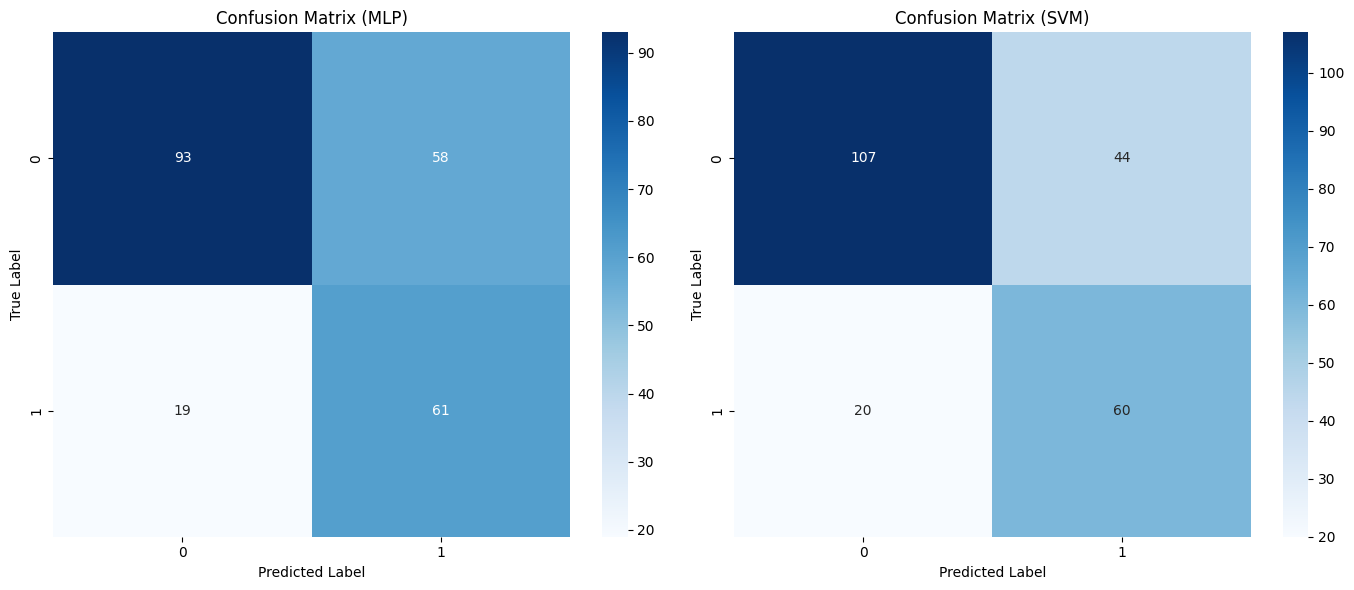

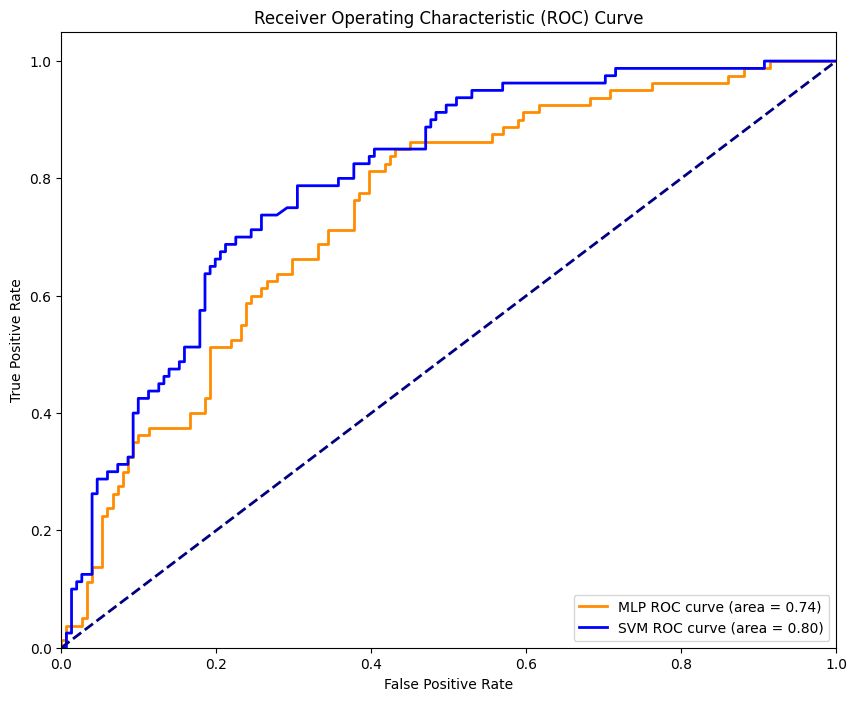

In [61]:
from imblearn.over_sampling import RandomOverSampler

# Veri setini %70 eğitim ve %30 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Az temsil edilen sınıfın örneklerini artırmak için RandomOverSampler kullanma
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Multi-Layer Perceptron (MLP) sınıflandırıcısını oluştur ve eğit
mlp_model = MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, n_iter_no_change=10)
mlp_model.fit(X_train_resampled, y_train_resampled)

# Test veri seti üzerinde tahminler yapma (MLP)
y_pred_mlp = mlp_model.predict(X_test)

# Confusion matrix oluşturma (MLP)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix (MLP):")
print(conf_matrix_mlp)

# Sınıflandırma raporu oluşturma (MLP)
class_report_mlp = classification_report(y_test, y_pred_mlp, zero_division=0)
print("Classification Report (MLP):")
print(class_report_mlp)

# Performans metrikleri (MLP)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
specificity_mlp = conf_matrix_mlp[0, 0] / (conf_matrix_mlp[0, 0] + conf_matrix_mlp[0, 1])
sensitivity_mlp = recall_mlp

print("Accuracy (MLP):", accuracy_mlp)
print("Sensitivity (MLP):", sensitivity_mlp)
print("Specificity (MLP):", specificity_mlp)
print("Recall (MLP):", recall_mlp)

# Support Vector Machines (SVM) sınıflandırıcısını oluştur ve eğit
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_resampled, y_train_resampled)

# Test veri seti üzerinde tahminler yapma (SVM)
y_pred_svm = svm_model.predict(X_test)

# Confusion matrix oluşturma (SVM)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix (SVM):")
print(conf_matrix_svm)

# Sınıflandırma raporu oluşturma (SVM)
class_report_svm = classification_report(y_test, y_pred_svm, zero_division=0)
print("Classification Report (SVM):")
print(class_report_svm)

# Performans metrikleri (SVM)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
specificity_svm = conf_matrix_svm[0, 0] / (conf_matrix_svm[0, 0] + conf_matrix_svm[0, 1])
sensitivity_svm = recall_svm

print("Accuracy (SVM):", accuracy_svm)
print("Sensitivity (SVM):", sensitivity_svm)
print("Specificity (SVM):", specificity_svm)
print("Recall (SVM):", recall_svm)

# Confusion Matrix'leri yan yana çizme
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MLP Confusion Matrix
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (MLP)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# SVM Confusion Matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (SVM)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# ROC eğrisi ve AUC skoru hesaplama (MLP)
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# ROC eğrisi ve AUC skoru hesaplama (SVM)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# ROC eğrilerini aynı grafik üzerinde çizme
plt.figure(figsize=(10, 8))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'MLP ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Veri seti %70 eğitim ve %30 test olarak ayrıldı ve dengesiz sınıfları dengelemek için RandomOverSampler kullanıldı. Bu yaklaşım, azınlık sınıfının örnek sayısını çoğaltarak modelin bu sınıfı daha iyi tanıyabilmesini sağlar. İki farklı model olan Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) modellerinin performanslarını değerlendirildi.

MLP modeli, azınlık sınıfı olan 1'i %76 duyarlılıkla (recall) doğru tahmin edebiliyor. Ancak, çoğunluk sınıfı olan 0'ı tahmin etmede %62 spesifiklik ile biraz daha düşük performans gösteriyor. Bu durum, modelin azınlık sınıfına odaklanırken bazı çoğunluk sınıfı örneklerini yanlış tahmin ettiğini gösteriyor.

SVM modeli, azınlık sınıfı olan 1'i %75 duyarlılıkla (recall) doğru tahmin edebiliyor. Çoğunluk sınıfı olan 0'ı tahmin etmede ise %71 spesifiklik ile MLP modelinden daha iyi bir performans sergiliyor. SVM modeli genel olarak daha yüksek doğruluk (accuracy) ve spesifiklik sağlıyor.  Bu, modelin genel olarak daha az hata yaptığını ve her iki sınıfı da daha doğru tanımlayabildiğini gösterir.

ROC eğrileri, modellerin sınıflandırma performansını değerlendirmek için kullanıldı.

MLP ROC AUC: 0.74

SVM ROC AUC: 0.80

SVM modelinin ROC AUC skoru, MLP modeline göre daha yüksek çıktı, bu da SVM'nin genel sınıflandırma performansının daha iyi olduğunu göstermektedir.

Genel olarak, SVM modeli MLP modeline kıyasla daha yüksek doğruluk ve ROC AUC skoru elde etti. Azınlık sınıfı için iyi bir duyarlılık ve çoğunluk sınıfı için makul bir özgüllük sergiledi. Bu sonuçlar, SVM modelinin azınlık sınıfını daha iyi ayırt edebildiğini ve bu veri seti ve problem için daha uygun bir model olduğunu göstermektedir. Bu nedenle, bu veri seti ve problem için SVM modeli tercih edilebilir. SVM'nin dengeli performansı, dengesiz veri kümelerinde önemli bir avantaj sağlar ve bu modeli daha güvenilir hale getirir.

# **Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) Sınıflandırıcıları Optimizasyonu**

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters (MLP): {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
Best Score (MLP): 0.6928521979923848

Confusion Matrix (MLP - Optimized):
[[125  26]
 [ 34  46]]

Classification Report (MLP - Optimized):
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231


Accuracy (MLP - Optimized): 0.7402597402597403
Sensitivity (MLP - Optimized): 0.575
Specificity (MLP - Optimized): 0.8278145695364238
Recall (MLP - Optimized): 0.575
Fitting 5 folds for each of 64 candidates, totalling 320 fits

Best Parameters (SVM): {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Best Score (SVM): 0.7820699203876773

Confusion Matrix (SVM -

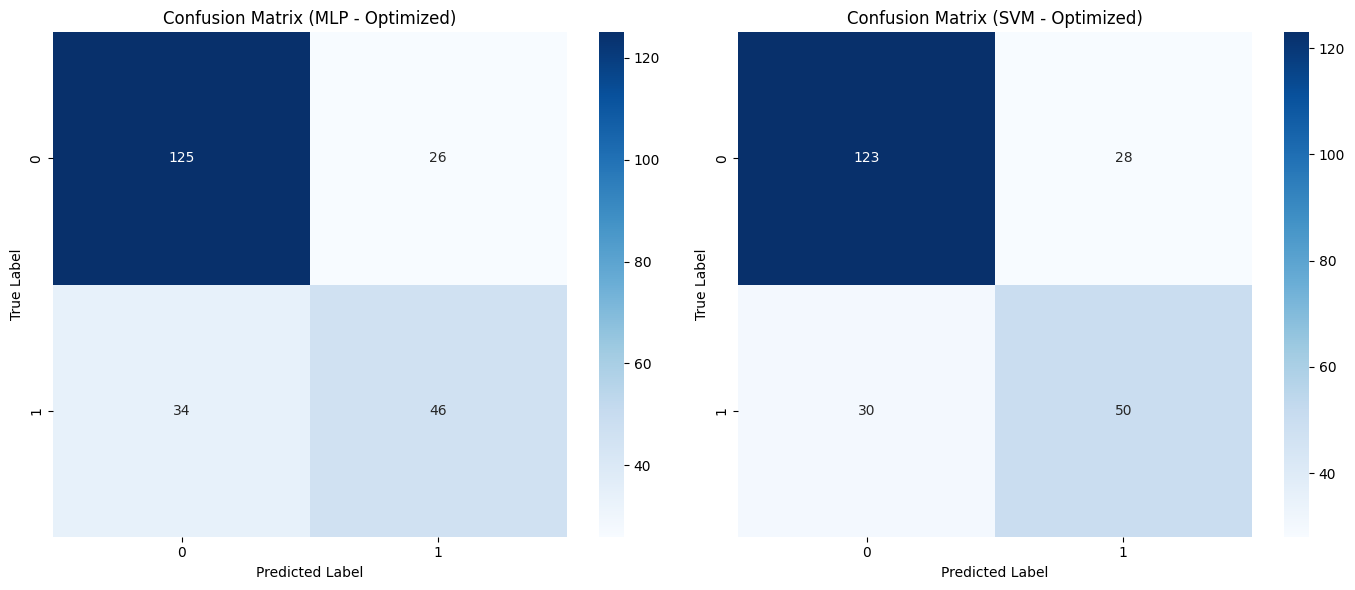

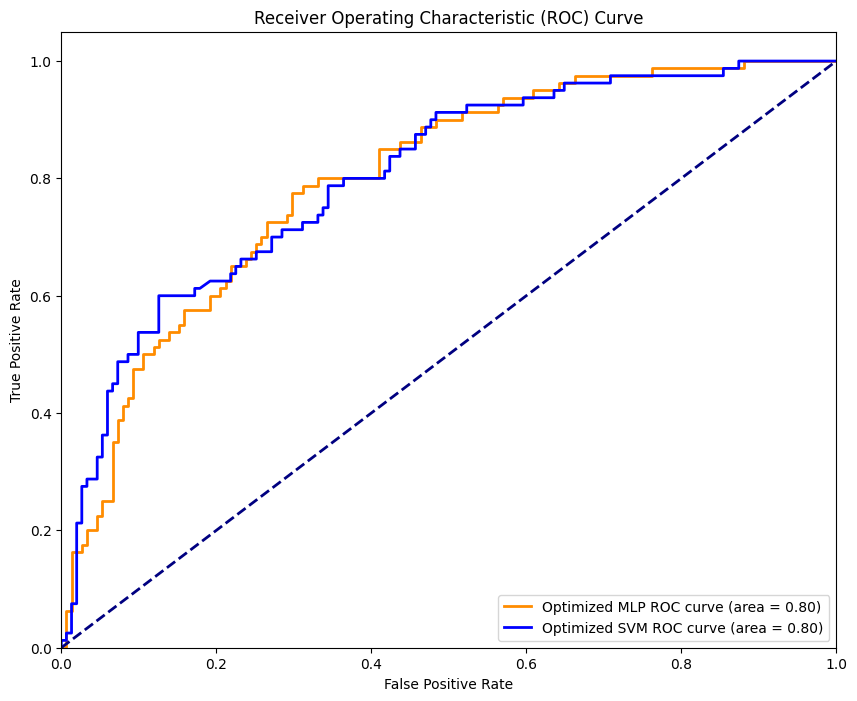

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini %70 eğitim ve %30 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Multi-Layer Perceptron (MLP) için optimize edilecek parametrelerin bir ızgarasını oluşturma
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
}

# GridSearchCV modelini oluşturma (MLP)
grid_search_mlp = GridSearchCV(estimator=MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, n_iter_no_change=10),
                               param_grid=param_grid_mlp, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Modeli eğitme (MLP)
grid_search_mlp.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru alın (MLP)
best_params_mlp = grid_search_mlp.best_params_
best_score_mlp = grid_search_mlp.best_score_

print("Best Parameters (MLP):", best_params_mlp)
print("Best Score (MLP):", best_score_mlp)

# En iyi modeli seçme (MLP)
best_model_mlp = grid_search_mlp.best_estimator_

# Test veri seti üzerinde tahminler yapma (MLP)
y_pred_mlp_optimized = best_model_mlp.predict(X_test)

# Confusion matrix oluşturma (MLP)
conf_matrix_mlp_optimized = confusion_matrix(y_test, y_pred_mlp_optimized)
print("\nConfusion Matrix (MLP - Optimized):")
print(conf_matrix_mlp_optimized)

# Sınıflandırma raporu oluşturma (MLP)
class_report_mlp_optimized = classification_report(y_test, y_pred_mlp_optimized, zero_division=0)
print("\nClassification Report (MLP - Optimized):")
print(class_report_mlp_optimized)

# Performans metrikleri (MLP)
accuracy_mlp_optimized = accuracy_score(y_test, y_pred_mlp_optimized)
recall_mlp_optimized = recall_score(y_test, y_pred_mlp_optimized)
specificity_mlp_optimized = conf_matrix_mlp_optimized[0, 0] / (conf_matrix_mlp_optimized[0, 0] + conf_matrix_mlp_optimized[0, 1])
sensitivity_mlp_optimized = recall_mlp_optimized

print("\nAccuracy (MLP - Optimized):", accuracy_mlp_optimized)
print("Sensitivity (MLP - Optimized):", sensitivity_mlp_optimized)
print("Specificity (MLP - Optimized):", specificity_mlp_optimized)
print("Recall (MLP - Optimized):", recall_mlp_optimized)

# SVM için optimize edilecek parametrelerin bir ızgarasını oluşturma
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# GridSearchCV modelini oluşturma (SVM)
grid_search_svm = GridSearchCV(estimator=SVC(random_state=42, probability=True),
                               param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Modeli eğitme (SVM)
grid_search_svm.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru alın (SVM)
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("\nBest Parameters (SVM):", best_params_svm)
print("Best Score (SVM):", best_score_svm)

# En iyi modeli seçme (SVM)
best_model_svm = grid_search_svm.best_estimator_

# Test veri seti üzerinde tahminler yapma (SVM)
y_pred_svm_optimized = best_model_svm.predict(X_test)

# Confusion matrix oluşturma (SVM)
conf_matrix_svm_optimized = confusion_matrix(y_test, y_pred_svm_optimized)
print("\nConfusion Matrix (SVM - Optimized):")
print(conf_matrix_svm_optimized)

class_report_svm_optimized = classification_report(y_test, y_pred_svm_optimized, zero_division=0)
print("\nClassification Report (SVM - Optimized):")
print(class_report_svm_optimized)

# Performans metrikleri (SVM)
accuracy_svm_optimized = accuracy_score(y_test, y_pred_svm_optimized)
recall_svm_optimized = recall_score(y_test, y_pred_svm_optimized)
specificity_svm_optimized = conf_matrix_svm_optimized[0, 0] / (conf_matrix_svm_optimized[0, 0] + conf_matrix_svm_optimized[0, 1])
sensitivity_svm_optimized = recall_svm_optimized

print("\nAccuracy (SVM - Optimized):", accuracy_svm_optimized)
print("Sensitivity (SVM - Optimized):", sensitivity_svm_optimized)
print("Specificity (SVM - Optimized):", specificity_svm_optimized)
print("Recall (SVM - Optimized):", recall_svm_optimized)

# Confusion Matrix'leri yan yana çizme (Optimized MLP ve Optimized SVM)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MLP Confusion Matrix (Optimized)
sns.heatmap(conf_matrix_mlp_optimized, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (MLP - Optimized)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# SVM Confusion Matrix (Optimized)
sns.heatmap(conf_matrix_svm_optimized, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (SVM - Optimized)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# ROC eğrisi ve AUC skoru hesaplama (Optimized MLP)
y_prob_mlp_optimized = best_model_mlp.predict_proba(X_test)[:, 1]
fpr_mlp_optimized, tpr_mlp_optimized, _ = roc_curve(y_test, y_prob_mlp_optimized)
roc_auc_mlp_optimized = roc_auc_score(y_test, y_prob_mlp_optimized)

# ROC eğrisi ve AUC skoru hesaplama (Optimized SVM)
y_prob_svm_optimized = best_model_svm.predict_proba(X_test)[:, 1]
fpr_svm_optimized, tpr_svm_optimized, _ = roc_curve(y_test, y_prob_svm_optimized)
roc_auc_svm_optimized = roc_auc_score(y_test, y_prob_svm_optimized)

# ROC eğrilerini aynı grafik üzerinde çizme
plt.figure(figsize=(10, 8))
plt.plot(fpr_mlp_optimized, tpr_mlp_optimized, color='darkorange', lw=2, label=f'Optimized MLP ROC curve (area = {roc_auc_mlp_optimized:.2f})')
plt.plot(fpr_svm_optimized, tpr_svm_optimized, color='blue', lw=2, label=f'Optimized SVM ROC curve (area = {roc_auc_svm_optimized:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Karşılaştırmalı Analiz**

**Accuracy:** Optimizasyon sonrasında hem MLP hem de SVM modellerinde doğruluk oranı artış göstermiştir. MLP için doğruluk %67'den %74'e, SVM için ise %72'den %75'e yükselmiştir.

**Sensitivity ve Specificity:** MLP modelinin duyarlılığı (sensitivity) optimizasyon öncesinde %76 iken optimizasyon sonrasında %58'e düşmüştür. Ancak özgüllük (specificity) %62'den %83'e çıkmıştır. SVM modelinde ise duyarlılık %75'ten %63'e düşmüş, özgüllük ise %71'den %81'e yükselmiştir. Bu, optimize edilmiş modellerin daha fazla doğru negatif (gerçek negatif) tahmin edebildiğini göstermektedir.

MLP modelinde, optimizasyon sonrasında gerçek pozitif (TP) sayısı artarken, gerçek negatif (TN) sayısı daha da artmıştır. Bu, modelin hem pozitif hem negatif sınıfları daha iyi ayırt edebildiğini gösterir.
SVM modelinde, optimizasyon sonrasında gerçek pozitif (TP) sayısı artmış ve gerçek negatif (TN) sayısı azalmıştır. Ancak, bu değişiklikler çok belirgin değildir.

**ROC AUC:** Her iki modelin ROC eğrisi altındaki alan (AUC) değerleri, optimizasyon sonrası iyileşmiştir. MLP modeli için AUC değeri %74'ten %80'e, SVM modeli için ise %80 olarak kalmıştır, bu da her iki modelin ayırt etme yeteneğinin arttığını göstermektedir.

**Sonuç**

Optimizasyon, her iki modelin de genel doğruluk ve ROC AUC değerlerini iyileştirmiştir. MLP modelinde özgüllük önemli ölçüde artarken, duyarlılık bir miktar azalmıştır. SVM modelinde ise hem doğruluk hem de özgüllük artmıştır. Bu sonuçlar, optimize edilmiş modellerin daha dengeli ve tutarlı bir performans sergilediğini göstermektedir.